# Week2 of mlzoomcamp Regression
Predict house price using California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

## Hightlights
🌟 Need to fillna with 0 or mean, if not, it will show errors. There is not much difference in choosing 0 or mean.
🌟 Explore the data. If there is a long tail or skew, use np.log1p()
🌟 Split the dataset to train, validation, and test. Need to use seed to fix the index. It can be tested to which seed is the best.
🌟 Use RMSE to validate your model using validation dataset
🌟 We can start from the base features and add more features to make the model more accurate, but more features can make it worse.
🌟 To solve duplicate columns, we add small values to the diagonal of the matrix
🌟 Start to use the model with the test dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

%matplotlib inline


In [2]:
# get data
# data = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv"
# !wget $data

In [3]:
# read data as data frame
df = pd.read_csv("housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

/home/labber/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/labber/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='median_house_value', ylabel='Count'>

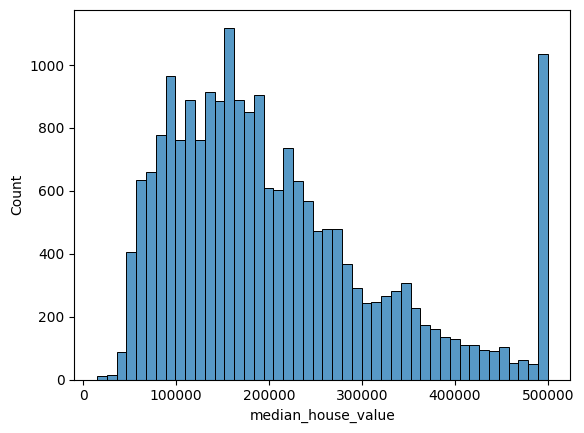

In [5]:
# check median_house_value distribution
sns.histplot(df["median_house_value"])

In [6]:
# keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'
california_df = df[
    (df["ocean_proximity"] == "<1H OCEAN") | (df["ocean_proximity"] == "INLAND")
]
california_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [7]:
# use only the following columns: 
# 'latitude',
# 'longitude',
# 'housing_median_age',
# 'total_rooms',
# 'total_bedrooms',
# 'population',
# 'households',
# 'median_income',
# 'median_house_value'

california_df = california_df[
    ['latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value']
]
california_df


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [8]:
# Q1 There's one feature with missing values. What is it?
california_df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [9]:
# What's the median (50% percentile) for variable 'population'?
california_df["population"].median()

1195.0

In [10]:
# Prepare and split the dataset
# Shuffle the dataset (the filtered one you created above), use seed 42
# Split your data in train/val/test sets, with 60%/20%/20% distribution.
# Apply the log transformation to the median_house_value variable using the np.log1p() function.

n = len(california_df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

n, n_val, n_test, n_train

(15687, 3137, 3137, 9413)

In [11]:
df_train = california_df.iloc[:n_train]
df_val = california_df[n_train: n_train + n_val]
df_test = california_df[n_train + n_val:]
df_train

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
11480,33.72,-118.03,24.0,5203.0,957.0,2465.0,946.0,5.1630,261000.0
11481,33.72,-118.04,24.0,7141.0,1330.0,3418.0,1268.0,4.6649,237800.0
11482,33.73,-117.99,24.0,2104.0,421.0,1181.0,414.0,3.8365,250900.0
11483,33.73,-118.00,26.0,2236.0,280.0,809.0,282.0,6.7395,342800.0


In [12]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 15684, 15685, 15686])

In [13]:
np.random.seed(42) #fix index
np.random.shuffle(idx) #shuffle the row

In [14]:
# random get the data
df_train = california_df.iloc[idx[:n_train]]
df_val = california_df.iloc[idx[n_train: n_train + n_val]]
df_test = california_df.iloc[idx[n_train + n_val:]]
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19963,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
5929,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
11377,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
6443,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
17546,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0


In [15]:
# check the length again
len(df_train), len(df_val), len(df_test)

(9413, 3137, 3137)

In [16]:
# reset the index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
1,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
2,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
3,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
4,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0


In [17]:
# Apply the log transformation to the median_house_value variable using the np.log1p() function.
y_train = np.log1p(df_train["median_house_value"].values)
y_val = np.log1p(df_val["median_house_value"].values)
y_test = np.log1p(df_test["median_house_value"].values)

In [18]:
# drop the target y value in the dataframe
del df_train["median_house_value"]
del df_val["median_house_value"]
del df_test["median_house_value"]

In [19]:
# recheck length
len(df_train)

9413

In [20]:
# w0 = np.round(y_train.mean(), 2)
w0 = 0 # get w0, when use the mean, the prediction is way off the target


In [21]:
# w = (X.T.X).inv * X.T * y
# fill in 0
X_0 = df_train.fillna(0).values
X_0 = np.array(X_0)

In [22]:
# ones array
# ones = np.ones(X_0.shape[0])

In [23]:
# add column ones
# X_0 = np.column_stack([ones, X_0])

In [24]:
# generate a list of y
# y = np.random.randint(100000, 500000, X_0.shape[0])

In [25]:
# XTX_0 = X_0.T.dot(X_0)
# XTX_inv_0 = np.linalg.inv(XTX_0)
# w_0 = XTX_inv_0.dot(X_0.T).dot(y_train)
# w_0

In [26]:
# y_0_pred = w0 + X_0.dot(w_0)
# y_0_pred

In [27]:
# w = (X.T.X).inv * X.T * y
# fill in mean
X_mean = df_train.fillna(value=df_train["total_bedrooms"].mean()).values
X_mean = np.array(X_mean)
# X_mean = np.column_stack([ones, X_mean])
# XTX_mean = X_mean.T.dot(X_mean)
# XTX_inv_mean = np.linalg.inv(XTX_mean)
# w_mean = XTX_inv_mean.dot(X_mean.T).dot(y_train)
# w_mean
df_train["total_bedrooms"].mean()


542.552956325786

In [28]:
# y_mean_pred = w0 + X_mean.dot(w_mean)
# y_mean_pred

In [29]:
# make the function
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [30]:
w0, w_0 = train_linear_regression(X_0, y_train)
y_0_pred = w0 + X_0.dot(w_0)
y_0_pred


array([11.48901968, 12.14856943, 12.45852739, ..., 12.91332356,
       11.93076692, 12.11614341])

In [31]:
w0

-9.763249477549328

/home/labber/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/labber/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/labber/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/labber/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

<Axes: ylabel='Count'>

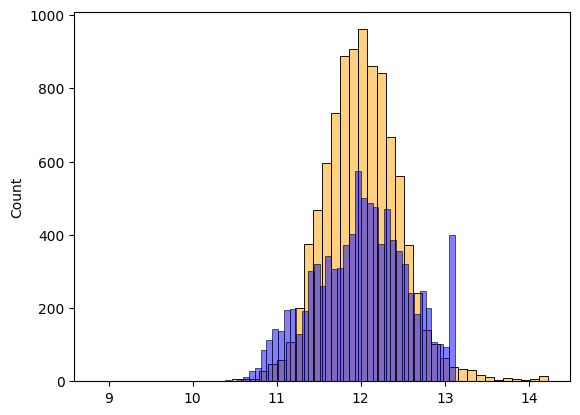

In [32]:
sns.histplot(y_0_pred, color="orange", bins=50, alpha=0.5)
sns.histplot(y_train, color="blue", bins=50, alpha=0.5)

In [33]:
w0, w_mean = train_linear_regression(X_mean, y_train)
y_mean_pred = w0 + X_mean.dot(w_mean)
y_mean_pred

array([11.48148474, 12.14204505, 12.45148382, ..., 12.9139426 ,
       11.93466055, 12.11281089])

/home/labber/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/labber/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/labber/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/labber/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

<Axes: ylabel='Count'>

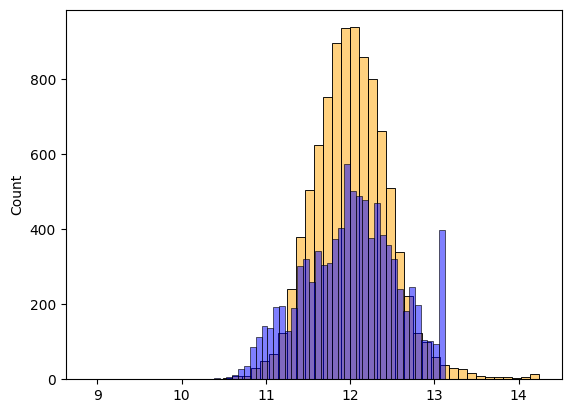

In [34]:
sns.histplot(y_mean_pred, color="orange", bins=50, alpha=0.5)
sns.histplot(y_train, color="blue", bins=50, alpha=0.5)

In [35]:
# validation
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)


In [40]:
# validate y_0 
rmse(y_0_pred, y_train)

0.3402719715829533

In [41]:
rmse(y_mean_pred, y_train)

0.340030082226426

In [45]:
base = ['latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    ]

# prepare the data fill with 0
def prepare_X_0(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

def prepare_X_mean(df):
    df_num = df[base]
    df_num = df_num.fillna(df_num.mean())
    X = df_num.values
    return X

In [48]:
#validation with fill in 0
X_train_0 = prepare_X_0(df_train)
w0, w_train_0 = train_linear_regression(X_train_0, y_train)

X_Val_0 = prepare_X_0(df_val)
y_pred_0 = w0 + X_Val_0.dot(w_train_0)

round(rmse(y_val, y_pred_0),2)

0.34

In [49]:
#validation with fill in mean
X_train_mean = prepare_X_mean(df_train)
w0, w_train_mean = train_linear_regression(X_train_mean, y_train)

X_Val_mean = prepare_X_0(df_val)
y_pred_mean = w0 + X_Val_mean.dot(w_train_mean)

round(rmse(y_val, y_pred_mean),2)

0.34

In [50]:
# regularization
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [54]:
# testing which r is the best
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X_0(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    
    X_val = prepare_X_0(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, round(score, 2))
    

0 -9.763249477549328 0.34
1e-06 -9.763228830691759 0.34
0.0001 -9.761185235424271 0.34
0.001 -9.742646249645812 0.34
0.01 -9.561056192433915 0.34
0.1 -8.058889769406882 0.34
1 -3.133154278513541 0.34
5 -0.8410867975396633 0.35
10 -0.438117231642521 0.35


Q5 We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
For each seed, do the train/validation/test split with 60%/20%/20% distribution.
Fill the missing values with 0 and train a model without regularization.
For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
Round the result to 3 decimal digits (round(std, 3))

In [79]:

seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
copy_df = california_df.copy()
copy_n = len(copy_df)
copy_n_val = int(n * 0.2)
copy_n_test = int(n * 0.2)
copy_n_train = copy_n - copy_n_val - copy_n_test
copy_df_train = copy_df.iloc[:copy_n_train]
copy_df_val = copy_df[copy_n_train: copy_n_train + copy_n_val]
copy_df_test = copy_df[copy_n_train + copy_n_val:]

def choose_seed(s):
    np.random.seed(s)
    np.random.shuffle(idx)
    copy_df_train = copy_df.iloc[idx[:copy_n_train]]
    copy_df_val = copy_df.iloc[idx[copy_n_train: copy_n_train + copy_n_val]]
    copy_df_test = copy_df.iloc[idx[copy_n_train + copy_n_val:]]
    copy_df_train = copy_df_train.reset_index(drop=True)
    copy_df_val = copy_df_val.reset_index(drop=True)
    copy_df_test = copy_df_test.reset_index(drop=True)
    copy_y_train = np.log1p(copy_df_train["median_house_value"].values)
    copy_y_val = np.log1p(copy_df_val["median_house_value"].values)
    copy_y_test = np.log1p(copy_df_test["median_house_value"].values)
    del copy_df_train["median_house_value"]
    del copy_df_val["median_house_value"]
    del copy_df_test["median_house_value"]

    copy_X_train_0 = prepare_X_0(copy_df_train)
    w0, copy_w_train_0 = train_linear_regression(copy_X_train_0, copy_y_train)

    copy_X_val_0 = prepare_X_0(copy_df_val)
    copy_y_pred_0 = w0 + copy_X_val_0.dot(copy_w_train_0)

    # print(s, rmse(copy_y_val, copy_y_pred_0))
    return rmse(copy_y_val, copy_y_pred_0)
    

In [80]:
rmse_list = []
for s in seeds:
    choose_seed(s)
    rmse_list.append(choose_seed(s))

In [81]:
rmse_list

[0.3422082113013014,
 0.3440772639411063,
 0.3500929236703016,
 0.3347140569565368,
 0.3416758070775177,
 0.34644413679286046,
 0.33935647341234526,
 0.3408940549583584,
 0.3426434560956675,
 0.3490721170881179]

In [82]:
# What's the standard deviation of all the scores? 
round(np.std(rmse_list),3)

0.004

Q6
Split the dataset like previously, use seed 9.
Combine train and validation datasets.
Fill the missing values with 0 and train a model with r=0.001.
What's the RMSE on the test dataset?

In [83]:
np.random.seed(9)
np.random.shuffle(idx)

df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
X_full_train = prepare_X_0(df_full_train)
X_full_train




array([[  36.23  , -119.14  ,   22.    , ..., 1927.    ,  530.    ,
           2.5875],
       [  34.12  , -117.79  ,   16.    , ..., 1319.    ,  446.    ,
           4.8125],
       [  33.68  , -117.97  ,   26.    , ..., 1930.    ,  585.    ,
           5.7301],
       ...,
       [  34.    , -118.04  ,   30.    , ..., 2114.    ,  838.    ,
           5.1985],
       [  34.1   , -118.15  ,   36.    , ..., 2277.    ,  828.    ,
           3.1211],
       [  34.09  , -117.71  ,   36.    , ..., 1385.    ,  483.    ,
           4.1739]])

In [84]:
y_full_train = np.concatenate([y_train, y_val])


In [85]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [86]:
x_test = prepare_X_0(df_test)
y_pred = w0 + x_test.dot(w)
score = rmse(y_test, y_pred)
score

0.3305081235532982